In [68]:
import numpy as np
import pandas as pd
from gtda.mapper import (
    CubicalCover,
    OneDimensionalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph
)
from gtda.mapper.cluster import ParallelClustering
from gtda.mapper import Eccentricity,Entropy

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans,MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, OPTICS

In [69]:
import openpyxl
xlsx = pd.ExcelFile('41591_2020_897_MOESM3_ESM.xlsx')
df = pd.read_excel(xlsx, '(B) Figure 1B')

In [70]:
df = df.rename({'IgG S/CO': 'IgG (S/CO)', 'IgM S/CO': 'IgM (S/CO)'}, axis=1)

In [71]:
df1 = df[['Patient ID','Days after symptoms onset', 'IgG (S/CO)', 'IgM (S/CO)', 'Severity']]

In [72]:
df1

,Patient ID,Days after symptoms onset,IgG (S/CO),IgM (S/CO),Severity
0,1,12,65.484,1.641,0
1,2,11,12.978,8.157,1
2,3,19,71.973,25.865,1
3,4,10,4.151,10.182,0
4,5,14,21.945,118.031,1
...,...,...,...,...,...
257,258,11,3.331,4.997,0
258,259,8,2.463,0.266,0
259,260,15,4.540,0.711,0
260,261,10,0.490,0.669,0


### Number of patients

In [73]:
len(df1)

262

### Number of several patients

In [74]:
sum(df1['Severity'])

39

### Making the table with the weeks.

In [75]:
df1_week =pd.DataFrame.copy(df1)

In [76]:
aux= []
for i in range(len(df1)):
    if 0<= df1['Days after symptoms onset'][i]<8:
        aux.append('1st week')
    elif 8<= df1['Days after symptoms onset'][i]<15:
        aux.append('2nd week')
    elif 15<= df1['Days after symptoms onset'][i]<22:
        aux.append('3rd week')
    else:
        aux.append('4th week')

In [77]:
df1_week['Week'] = aux
df1_week

,Patient ID,Days after symptoms onset,IgG (S/CO),IgM (S/CO),Severity,Week
0,1,12,65.484,1.641,0,2nd week
1,2,11,12.978,8.157,1,2nd week
2,3,19,71.973,25.865,1,3rd week
3,4,10,4.151,10.182,0,2nd week
4,5,14,21.945,118.031,1,2nd week
...,...,...,...,...,...,...
257,258,11,3.331,4.997,0,2nd week
258,259,8,2.463,0.266,0,2nd week
259,260,15,4.540,0.711,0,3rd week
260,261,10,0.490,0.669,0,2nd week


In [78]:
sum(df1_week['Severity'] )

39

# Analysis without severity information

In [79]:
df1.drop(['Patient ID'], axis=1)

,Days after symptoms onset,IgG (S/CO),IgM (S/CO),Severity
0,12,65.484,1.641,0
1,11,12.978,8.157,1
2,19,71.973,25.865,1
3,10,4.151,10.182,0
4,14,21.945,118.031,1
...,...,...,...,...
257,11,3.331,4.997,0
258,8,2.463,0.266,0
259,15,4.540,0.711,0
260,10,0.490,0.669,0


## Filtro: Eccentricity

In [80]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')
cover = OneDimensionalCover(n_intervals=100, overlap_frac=0.95, kind = 'balanced')

clusterer = DBSCAN(eps = 0.01,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    contract_nodes=True,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

In [81]:
node_scale = 20
fig = plot_interactive_mapper_graph(pipe, 
                                    df1.drop(['Patient ID'], axis=1), 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data = df1,
                                    plotly_params = {"layout" : {"font_size":14}}),
fig[0]
#fig2[0].write_image("images/api2.pdf")

In [82]:
node_scale = 20
fig2 = plot_static_mapper_graph(pipe, 
                                    df1.drop(['Patient ID'], axis=1), 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data= df1[['IgG (S/CO)']],
                                    plotly_params = {"layout" : {"font_size":14}}
                                   ),
fig2[0].write_image("images/gen_wsev_IgG.pdf")

In [83]:
node_scale = 20
fig2 = plot_static_mapper_graph(pipe, 
                                    df1.drop(['Patient ID'], axis=1), 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data= df1[[ 'IgM (S/CO)']],
                                    plotly_params = {"layout" : {"font_size":14}}
                                   ),
fig2[0].write_image("images/gen_wsev_IgM.pdf")

In [84]:
node_scale = 20
fig2 = plot_static_mapper_graph(pipe, 
                                    df1.drop(['Patient ID'], axis=1), 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data= df1[[ 'Days after symptoms onset']],
                                    plotly_params = {"layout" : {"font_size":14}}
                                   ),
fig2[0].write_image("images/gen_wsev_Days.pdf")

In [85]:
node_scale = 20
fig2 = plot_static_mapper_graph(pipe, 
                                    df1.drop(['Patient ID'], axis=1), 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data= df1[['Severity']],
                                    plotly_params = {"layout" : {"font_size":14}}
                                   ),
fig2[0].write_image("images/gen_wsev_Severity.pdf")

In [86]:
node_scale = 20
fig2 = plot_static_mapper_graph(pipe, 
                                    df1.drop(['Patient ID'], axis=1), 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data= df1[['IgG (S/CO)'
                                                     
                                                    ]],
                                    plotly_params = {"layout" : {"font_size":14}}
                                   ),
fig2[0].write_image("images/gen_wsev_IgG.pdf")

In [87]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

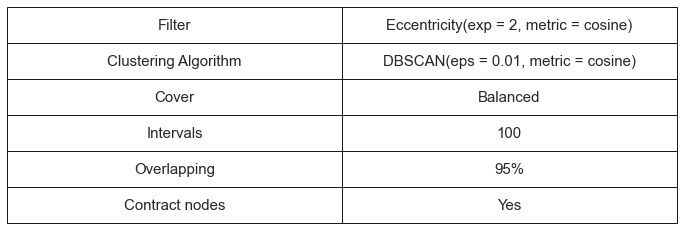

In [88]:
meta_table = plt.table(cellText=[['Filter', 'Eccentricity(exp = 2, metric = cosine)'], 
     ['Clustering Algorithm', 'DBSCAN(eps = 0.01, metric = cosine)'],
     ['Cover', 'Balanced'],
     ['Intervals', '100'],
     ['Overlapping', '95%'],
     ['Contract nodes', 'Yes']],
         cellLoc = 'center',
         loc = 'center',
         colLoc = 'center',
         rowLoc = 'center',
         #cellColours = [['#CBF2B8','w'],['#CBF2B8','w'],['#CBF2B8','w'],['#CBF2B8','w'],['#CBF2B8','w'],['#CBF2B8','w']],
         edges = 'closed',
         #colWidths = [0.05,0.20,0.10,0.10,0.10]
         )
plt.axis('off')
meta_table.auto_set_font_size(False)
meta_table.set_fontsize(15)
meta_table.scale(2,3)
meta_fig = meta_table.figure

pp = PdfPages("tabfig1.pdf")
pp.savefig(meta_fig, bbox_inches='tight')
pp.close()

# Constructing the table for groups A, B and C.

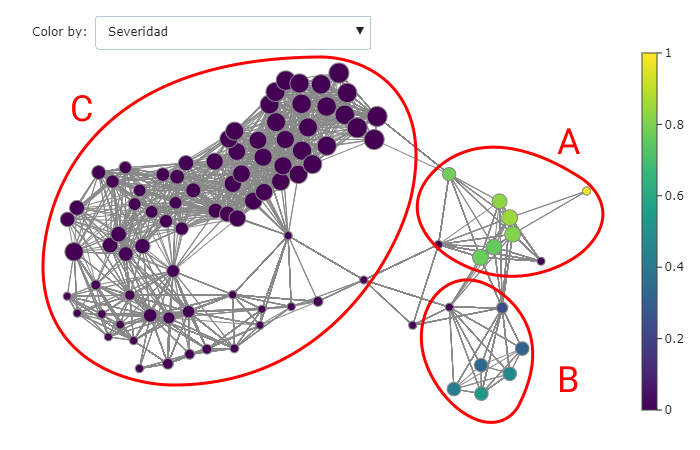

In [89]:
from IPython import display
display.Image("./g1.png")

In [90]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from seaborn import histplot as hist
sns.set_theme(style="whitegrid")
%matplotlib inline

In [91]:
graph = pipe.fit_transform(df1.drop(['Patient ID'], axis=1))
node_elements = graph.vs["node_elements"]

In [92]:
range(len(node_elements))

range(0, 96)

### Groups of nodes:
- Group $A$: Nodes with at least $70\%$ of samples from severe patients.
- Group $B$: Nodes with $20\%-60\%$.
- Group $C$: Nodes with $0\%$.

In [93]:
group_A_id = []
group_B_id = []
group_C_id = []
for i in range(len(node_elements)):
    if 0.70 <= np.mean(df1_week.iloc[node_elements[i]]['Severity']):
        group_A_id.append(i)
    elif 0.2 <= np.mean(df1_week.iloc[node_elements[i]]['Severity'])<=0.6:
        group_B_id.append(i)
    elif 0 == np.mean(df1_week.iloc[node_elements[i]]['Severity']):
        group_C_id.append(i)

group_AuB_id = list(set(group_A_id).union(set(group_B_id)))
group_AuBuC_id = list(set(group_AuB_id).union(set(group_C_id)))

group_A_id = list(set(group_A_id))
group_B_id = list(set(group_B_id))
group_C_id = list(set(group_C_id))

In [94]:
group_A_id

[3, 4, 5, 6, 7, 11, 92]

### Recovering the samples of each node.

In [95]:
def Nodes(nodes, data,pipe):
    graph = pipe.fit_transform(data)
    node_id = []
    node_elements = graph.vs["node_elements"]
    ne = []
    da = []
    data_points = []
    for i in nodes:
        node_id.append(i)
        ne.append(node_elements[node_id[-1]])
        x = np.asarray(df1_week.iloc[node_elements[node_id[-1]]])
        data_points.append(x)    
    return node_id,ne,data_points

In [96]:
aa,ba,a = Nodes(group_A_id, df1.drop(['Patient ID'], axis=1), pipe)
ab,bb,b = Nodes(group_B_id, df1.drop(['Patient ID'], axis=1), pipe)
ac,bc,c = Nodes(group_C_id, df1.drop(['Patient ID'], axis=1), pipe)
aaub,baub,aub = Nodes(group_AuB_id, df1.drop(['Patient ID'], axis=1), pipe)
aaubuc,baubuc,aubuc = Nodes(group_AuBuC_id, df1.drop(['Patient ID'], axis=1), pipe)

In [97]:
def table(x):
    IgGg = []
    IgMg = []
    #GMg = []
    #Daysg = []
    #Severig = []

    for i in range(len(x)):
        IgGg.append(np.array([[x[i][k][0], x[i][k][1], x[i][k][2], x[i][k][4], x[i][k][-1]] for k in range(len(x[i]))]))
        IgMg.append(np.array([[x[i][k][0], x[i][k][1], x[i][k][3], x[i][k][4], x[i][k][-1]] for k in range(len(x[i]))]))

    IgGg = np.unique(np.concatenate(IgGg),axis = 0)
    IgMg = np.unique(np.concatenate(IgMg),axis = 0)
    IgGg = pd.DataFrame(IgGg, columns = ['Patient ID', 'Days', 'Antibody level', 'Severity','Week'])
    IgMg = pd.DataFrame(IgMg, columns = ['Patient ID', 'Days', 'Antibody level', 'Severity','Week'])
    
    IgG_group_x = IgGg
    
    IgM_group_x = IgMg
    
    for i in range(len(IgG_group_x)):
        if IgG_group_x['Severity'][i] == '1':
            IgG_group_x['Severity'][i] = 'Severe'
        elif IgG_group_x['Severity'][i] == '0':
            IgG_group_x['Severity'][i] = 'Non-severe'
        
    for i in range(len(IgM_group_x)):
        if IgM_group_x['Severity'][i] == '1':
            IgM_group_x['Severity'][i] = 'Severe'
        elif IgM_group_x['Severity'][i] == '0':
            IgM_group_x['Severity'][i] = 'Non-severe'
            
    IgG_group_x = IgG_group_x.astype({"Patient ID": int, "Days": int, "Antibody level": float, "Severity": str, "Week": str})
    IgM_group_x = IgM_group_x.astype({"Patient ID": int, "Days": int, "Antibody level": float, "Severity": str, "Week": str})

    IgG_group_x['Antibody level'] = np.log2(IgG_group_x['Antibody level'])
    IgM_group_x['Antibody level'] = np.log2(IgM_group_x['Antibody level'])
    
    IgG_group_x = IgG_group_x.sort_values(by=['Patient ID', 'Days'])
    IgM_group_x = IgM_group_x.sort_values(by=['Patient ID', 'Days'])
    
    print('Maximum day:', max(IgG_group_x['Days']))
    return IgG_group_x, IgM_group_x

### Tables of each group

In [98]:
IgG_group_A, IgM_group_A = table(a)

Maximum day: 27


In [99]:
IgG_group_B, IgM_group_B = table(b)

Maximum day: 21


In [100]:
IgG_group_C, IgM_group_C = table(c)

Maximum day: 26


In [101]:
IgG_group_AuB, IgM_group_AuB = table(aub)

Maximum day: 27


In [102]:
IgG_group_AuBuC_general, IgM_group_AuBuC_general = table(aubuc)

Maximum day: 27


In [103]:
len(IgG_group_AuB)

67

In [104]:
len(IgG_group_A), len(IgG_group_B), len(IgG_group_AuB), len(IgG_group_AuBuC_general)

(40, 29, 67, 262)

In [105]:
IgG_group_A['Mark'] = ['A']*len(IgG_group_A)
IgG_group_B['Mark'] = ['B']*len(IgG_group_B)
IgG_group_C['Mark'] = ['C']*len(IgG_group_C)
IgG_group_AuB['Mark'] = ['A $\cup$ B']*len(IgG_group_AuB)


IgM_group_A['Mark'] = ['A']*len(IgM_group_A)
IgM_group_B['Mark'] = ['B']*len(IgM_group_B)
IgM_group_C['Mark'] = ['C']*len(IgM_group_C)
IgM_group_AuB['Mark'] = ['A $\cup$ B']*len(IgM_group_AuB)

In [106]:
IgG_group_AuBuC = pd.concat([IgG_group_A,IgG_group_B,IgG_group_C])
IgM_group_AuBuC = pd.concat([IgM_group_A,IgM_group_B,IgM_group_C])

In [107]:
IgG_group_AuB_C = pd.concat([IgG_group_AuB,IgG_group_C])
IgM_group_AuB_C = pd.concat([IgM_group_AuB,IgM_group_C])

IgG_group_A_B =  pd.concat([IgG_group_A,IgG_group_B])
IgM_group_A_B =  pd.concat([IgM_group_A,IgM_group_B])

IgG_group_A_C =  pd.concat([IgG_group_A,IgG_group_C])
IgM_group_A_C =  pd.concat([IgM_group_A,IgM_group_C])

## Histogram of A vs B vs C

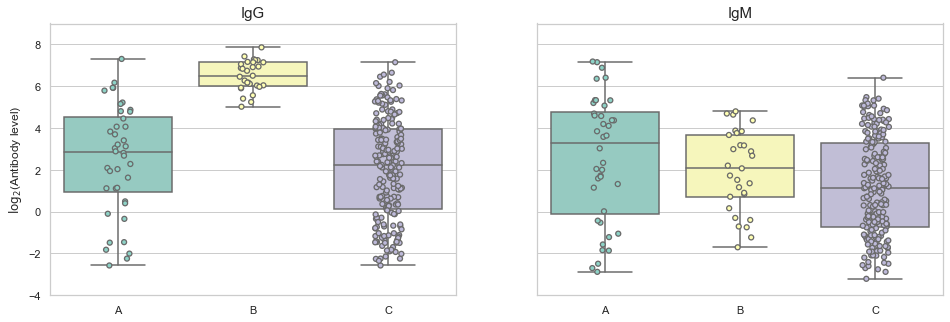

In [108]:
fig, ax =  plt.subplots(1,2, figsize=(16,5), sharey = True)    
ax1 = sns.boxplot(x = 'Mark',
                        y = 'Antibody level',
                        order=["A", "B", "C"],
                        data = IgG_group_AuBuC,
                        palette="Set3",
                        ax=ax[0],
                        fliersize=0
                            )

sns.stripplot(x = 'Mark',
                        y = 'Antibody level',     
                        data = IgG_group_AuBuC,
                        order=["A", "B", "C"],
                        palette="Set3",
                        ax=ax[0],
                        linewidth=1.3,
                        edgecolor='gray'
                          )
    
ax2 = sns.boxplot(x = 'Mark',
                        y = 'Antibody level',
                        data = IgM_group_AuBuC,
                        order=["A", "B", "C"],
                        palette="Set3",
                        ax=ax[1],
                        fliersize=0
                        )

sns.stripplot(x = 'Mark',
                      y = 'Antibody level',
                      data = IgM_group_AuBuC,
                      order=["A", "B", "C"],
                      palette="Set3",
                      ax=ax[1],
                      linewidth=1.3,
                      edgecolor='gray'
                      )

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

ax[0].set(xlabel=None,ylim=(-4, 9))
ax[1].set(xlabel = None, ylabel=None)
ax[0].set(ylabel='$\log_2$(Antibody level)', xlabel = None)
ax[0].set_title('IgG', fontsize=15)
ax[1].set_title('IgM', fontsize=15)
#fig.suptitle("A vs B vs C", fontsize=20)
plt.savefig('gAvsBvsC.pdf')

## Histogram of A $\cup$ B vs C

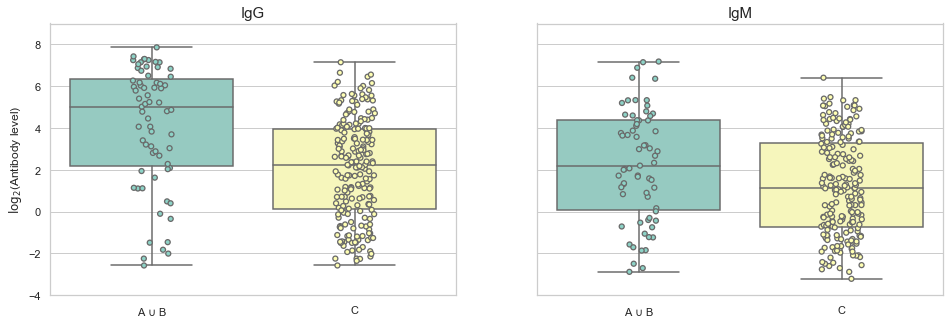

In [109]:
fig, ax =  plt.subplots(1,2, figsize=(16,5), sharey = True)    
sns.boxplot(x = 'Mark',
                        y = 'Antibody level',
                        order=["A $\cup$ B", "C"],
                        data = IgG_group_AuB_C,
                        palette="Set3",
                        ax=ax[0],
                        fliersize=0
                            )

sns.stripplot(x = 'Mark',
                        y = 'Antibody level',     
                        data = IgG_group_AuB_C,
                        order=["A $\cup$ B", "C"],
                        palette="Set3",
                        ax=ax[0],
                        linewidth=1.3,
                        edgecolor='gray'
                          )
    
sns.boxplot(x = 'Mark',
                        y = 'Antibody level',
                        data = IgM_group_AuB_C,
                        order=["A $\cup$ B", "C"],
                        palette="Set3",
                        ax=ax[1],
                        fliersize=0
                        )

sns.stripplot(x = 'Mark',
                      y = 'Antibody level',
                      data = IgM_group_AuB_C,
                      order=["A $\cup$ B", "C"],
                      palette="Set3",
                      ax=ax[1],
                      linewidth=1.3,
                      edgecolor='gray'
                      )
ax[0].set(xlabel=None,ylim=(-4, 9))
ax[1].set(xlabel = None, ylabel=None)
ax[0].set(ylabel='$\log_2$(Antibody level)', xlabel = None)
ax[0].set_title('IgG', fontsize=15)
ax[1].set_title('IgM', fontsize=15)
#fig.suptitle("A $\cup$ B vs C", fontsize=20)
plt.savefig('gAvsBvsC.pdf')

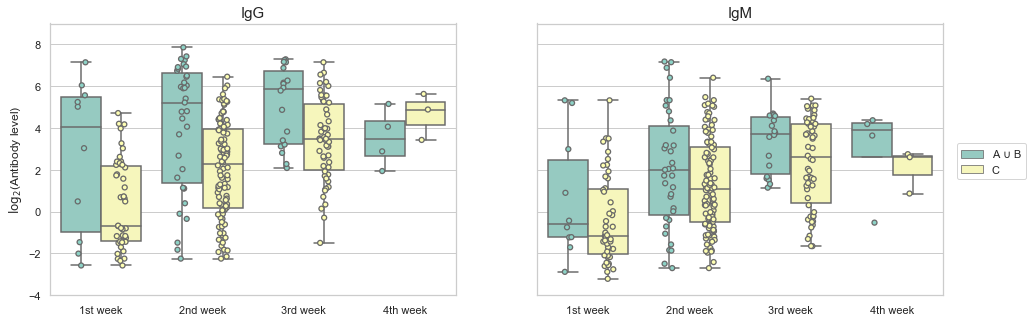

In [110]:
fig, ax =  plt.subplots(1,2, figsize=(16,5), sharey = True)    
ax1 = sns.boxplot(x = 'Week',
                        y = 'Antibody level',
                        hue= 'Mark',
                        hue_order = ['A $\cup$ B', 'C'],
                        order=["1st week","2nd week","3rd week", "4th week"],
                        data = IgG_group_AuB_C,
                        palette="Set3",
                        dodge =True,
                        ax=ax[0],
                        fliersize=0
                            )

sns.stripplot(x = 'Week',
                        y = 'Antibody level',  
                        hue= 'Mark',
                        hue_order = ['A $\cup$ B', 'C'],
                        data = IgG_group_AuB_C,
                        order=["1st week","2nd week","3rd week", "4th week"],
                        palette="Set3",
                        dodge =True,
                        ax=ax[0],
                        linewidth=1.3,
                        edgecolor='gray'
                          )
    
ax2 = sns.boxplot(x = 'Week',
                        y = 'Antibody level',
                        hue= 'Mark',
                        hue_order = ['A $\cup$ B', 'C'],
                        data = IgM_group_AuB_C,
                        order=["1st week","2nd week","3rd week", "4th week"],
                        palette="Set3",
                        dodge =True,
                        ax=ax[1],
                        fliersize=0
                        )

sns.stripplot(x = 'Week',
                      y = 'Antibody level',
                      hue= 'Mark',
                      hue_order = ['A $\cup$ B', 'C'],
                      data = IgM_group_AuB_C,
                      order=["1st week","2nd week","3rd week", "4th week"],
                      palette="Set3",
                      dodge =True,
                      ax=ax[1],
                      linewidth=1.3,
                      edgecolor='gray'
                      )

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()


ax[0].set(xlabel=None,ylim=(-4, 9))
ax[0].legend([],[], frameon=False)
ax[1].set(xlabel = None, ylabel=None)
ax[0].set(ylabel='$\log_2$(Antibody level)', xlabel = None)
ax[0].set_title('IgG', fontsize=15)
ax[1].set_title('IgM', fontsize=15)


#ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
#fig.suptitle("A $\cup$ B vs C", fontsize=20)


l = plt.legend(handles1[0:2], labels1[0:2], bbox_to_anchor=(1.02, 0.58), loc=2)

plt.savefig('wAuBvsC.pdf')

## Histogram of A vs B

Text(0.5, 0.98, 'A vs B')

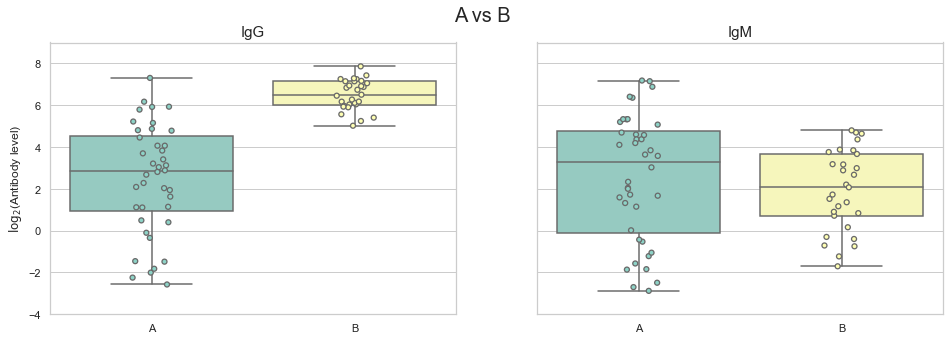

In [111]:
fig, ax =  plt.subplots(1,2, figsize=(16,5), sharey = True)    
sns.boxplot(x = 'Mark',
                        y = 'Antibody level',
                        order=["A", "B"],
                        data = IgG_group_A_B,
                        palette="Set3",
                        ax=ax[0],
                        fliersize=0
                            )

sns.stripplot(x = 'Mark',
                        y = 'Antibody level',     
                        data = IgG_group_A_B,
                        order=["A", "B"],
                        palette="Set3",
                        ax=ax[0],
                        linewidth=1.3,
                        edgecolor='gray'
                          )
    
sns.boxplot(x = 'Mark',
                        y = 'Antibody level',
                        data = IgM_group_A_B,
                        order=["A", "B"],
                        palette="Set3",
                        ax=ax[1],
                        fliersize=0
                        )

sns.stripplot(x = 'Mark',
                      y = 'Antibody level',
                      data = IgM_group_A_B,
                      order=["A", "B"],
                      palette="Set3",
                      ax=ax[1],
                      linewidth=1.3,
                      edgecolor='gray'
                      )
ax[0].set(xlabel=None,ylim=(-4, 9))
ax[1].set(xlabel = None, ylabel=None)
ax[0].set(ylabel='$\log_2$(Antibody level)', xlabel = None)
ax[0].set_title('IgG', fontsize=15)
ax[1].set_title('IgM', fontsize=15)
fig.suptitle("A vs B", fontsize=20)



## Histogram of A vs C

Text(0.5, 0.98, 'A vs C')

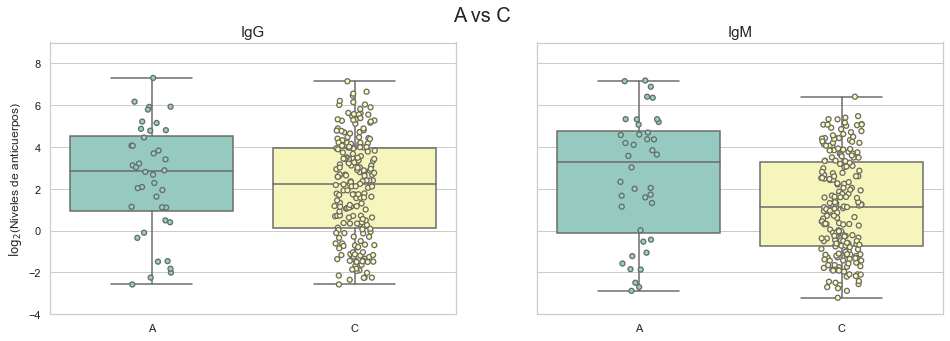

In [108]:
fig, ax =  plt.subplots(1,2, figsize=(16,5), sharey = True)    
sns.boxplot(x = 'Mark',
                        y = 'Antibody level',
                        order=["A", "C"],
                        data = IgG_group_A_C,
                        palette="Set3",
                        ax=ax[0],
                        fliersize=0
                            )

sns.stripplot(x = 'Mark',
                        y = 'Antibody level',     
                        data = IgG_group_A_C,
                        order=["A", "C"],
                        palette="Set3",
                        ax=ax[0],
                        linewidth=1.3,
                        edgecolor='gray'
                          )
    
sns.boxplot(x = 'Mark',
                        y = 'Antibody level',
                        data = IgM_group_A_C,
                        order=["A", "C"],
                        palette="Set3",
                        ax=ax[1],
                        fliersize=0
                        )

sns.stripplot(x = 'Mark',
                      y = 'Antibody level',
                      data = IgM_group_A_C,
                      order=["A", "C"],
                      palette="Set3",
                      ax=ax[1],
                      linewidth=1.3,
                      edgecolor='gray'
                      )
ax[0].set(xlabel=None,ylim=(-4, 9))
ax[1].set(xlabel = None, ylabel=None)
ax[0].set(ylabel='$\log_2$(Antibody level)', xlabel = None)
ax[0].set_title('IgG', fontsize=15)
ax[1].set_title('IgM', fontsize=15)
fig.suptitle("A vs C", fontsize=20)

## Histogram of A vs C. First two weeks.

In [112]:
A_C_IgG_2 = pd.concat([IgG_group_A_C[IgG_group_A_C['Week'] =='1st week'], IgG_group_A_C[IgG_group_A_C['Week'] =='2nd week']])

A_C_IgM_2 = pd.concat([IgM_group_A_C[IgM_group_A_C['Week'] =='1st week'], IgM_group_A_C[IgM_group_A_C['Week'] =='2nd week']])

Text(0.5, 0.98, 'A vs C first two weeks')

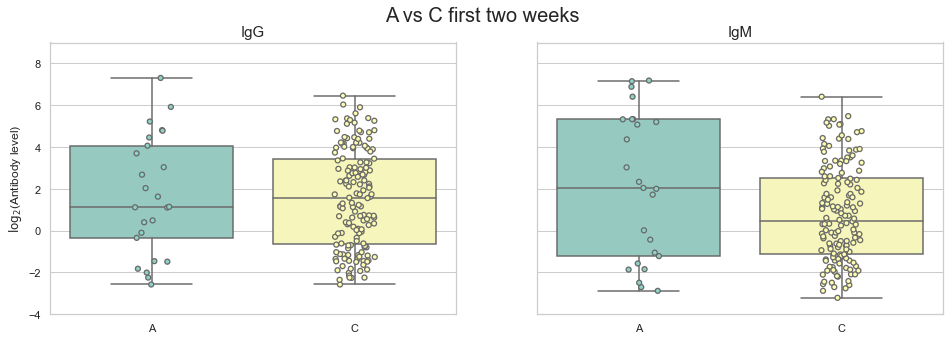

In [113]:
fig, ax =  plt.subplots(1,2, figsize=(16,5), sharey = True)    
sns.boxplot(x = 'Mark',
                        y = 'Antibody level',
                        order=["A", "C"],
                        data = A_C_IgG_2,
                        palette="Set3",
                        ax=ax[0],
                        fliersize=0
                            )

sns.stripplot(x = 'Mark',
                        y = 'Antibody level',     
                        data = A_C_IgG_2,
                        order=["A", "C"],
                        palette="Set3",
                        ax=ax[0],
                        linewidth=1.3,
                        edgecolor='gray'
                          )
    
sns.boxplot(x = 'Mark',
                        y = 'Antibody level',
                        data = A_C_IgM_2,
                        order=["A", "C"],
                        palette="Set3",
                        ax=ax[1],
                        fliersize=0
                        )

sns.stripplot(x = 'Mark',
                      y = 'Antibody level',
                      data = A_C_IgM_2,
                      order=["A", "C"],
                      palette="Set3",
                      ax=ax[1],
                      linewidth=1.3,
                      edgecolor='gray'
                      )
ax[0].set(xlabel=None,ylim=(-4, 9))
ax[1].set(xlabel = None, ylabel=None)
ax[0].set(ylabel='$\log_2$(Antibody level)', xlabel = None)
ax[0].set_title('IgG', fontsize=15)
ax[1].set_title('IgM', fontsize=15)
fig.suptitle("A vs C first two weeks", fontsize=20)

### By week

In [114]:
def histo_week(dataG, dataM, x):
    fig, ax = plt.subplots(1,2, figsize=(16,5), sharey = True)  

    sns.boxplot(x = 'Week',
                         y = 'Antibody level',
                         #hue = 'Severity',
                         order=["1st week","2nd week","3rd week", "4th week"],
                         data = dataG,
                         palette="Set3",
                         ax=ax[0]
                        )

    sns.stripplot(x = 'Week',
                      y = 'Antibody level',
                      order=["1st week","2nd week","3rd week", "4th week"],
                      data = dataG,
                      palette="Set1",
                      ax=ax[0]
                      )

    sns.boxplot(x = 'Week',
                         y = 'Antibody level',
                         #hue = 'Severity',
                         order=["1st week","2nd week","3rd week", "4th week"],
                         data = dataM,
                         palette="Set3",
                         ax=ax[1]
                        )

    sns.stripplot(x = 'Week',
                      y = 'Antibody level',
                      order=["1st week","2nd week","3rd week", "4th week"],
                      data = dataM,
                      palette="Set1",
                      ax=ax[1]
                      )


    ax[0].set(xlabel=None,ylim=(-3, 9))
    ax[0].set(ylabel='$\log_2$(Antibody level)')
    ax[0].set_title('IgG', fontsize=15)
    ax[1].set_title('IgM', fontsize=15)
    fig.suptitle("Group {0}".format(x), fontsize=20)

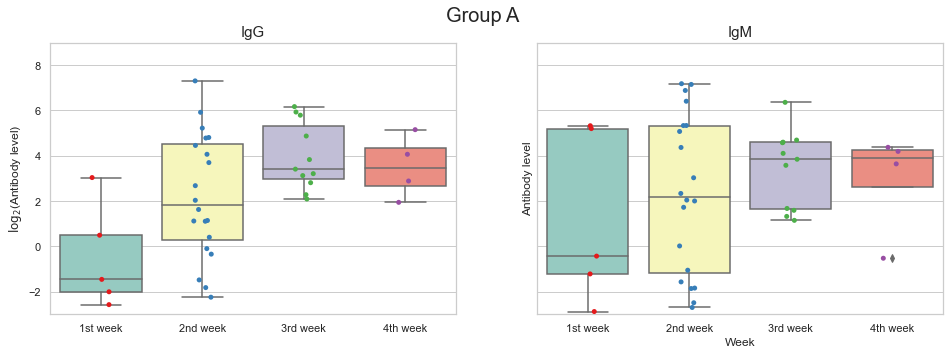

In [115]:
histo_week(IgG_group_A,IgM_group_A, 'A')

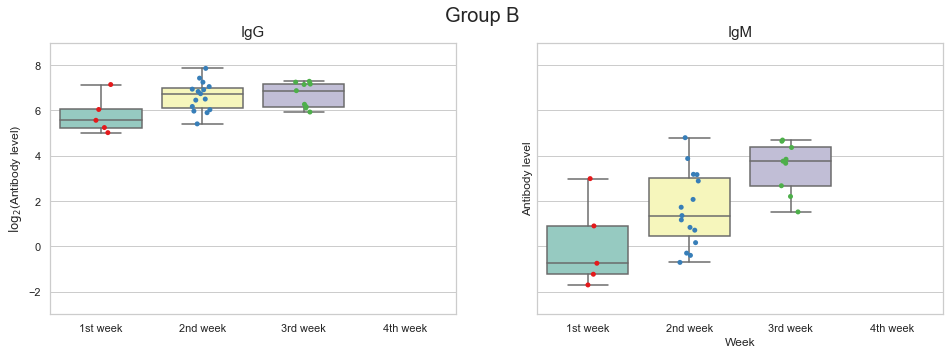

In [116]:
histo_week(IgG_group_B,IgM_group_B, 'B')

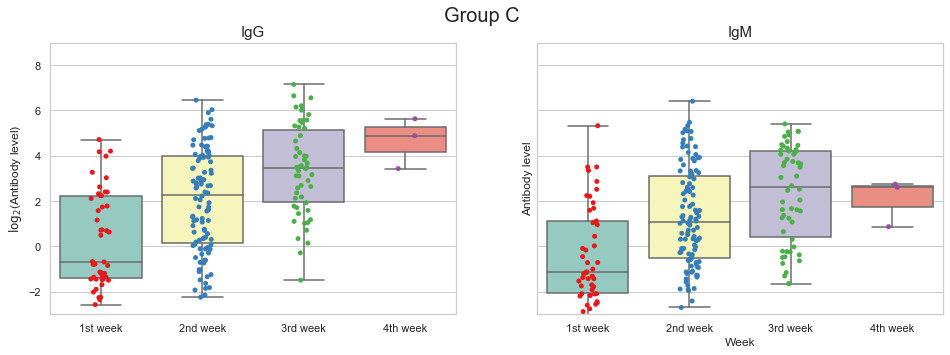

In [117]:
histo_week(IgG_group_C, IgM_group_C,'C')

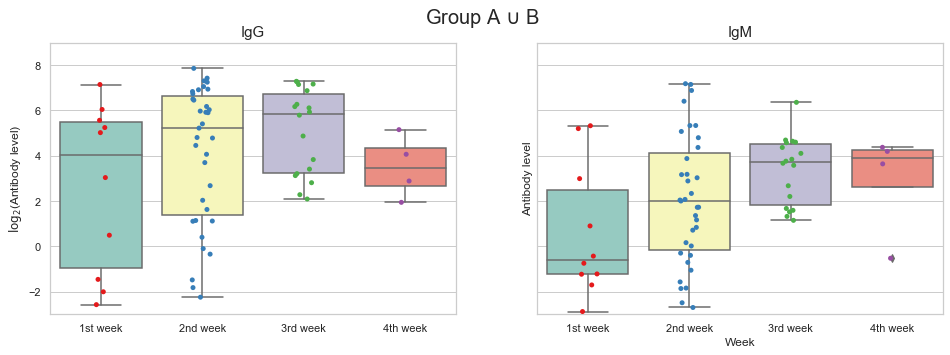

In [118]:
histo_week(IgG_group_AuB,IgM_group_AuB, 'A $\cup$ B')

### By severity

In [119]:
def histo_sev(dataG, dataM, x):
    if x != 'C':
        fig, ax = plt.subplots(1,2, figsize=(16,5), sharey = True)  

        sns.boxplot(x = 'Severity',
                             y = 'Antibody level',
                             order = ['Severe', 'Non-severe'],
                             data = dataG,
                             palette="Set3",
                             ax=ax[0],
                            fliersize=0
                            )

        sns.stripplot(x = 'Severity',
                          y = 'Antibody level',
                          order = ['Severe', 'Non-severe'],
                          data = dataG,
                          palette="Set3",
                          ax=ax[0],
                          linewidth=1.3,
                          edgecolor='gray'
                          )

        sns.boxplot(x = 'Severity',
                             y = 'Antibody level',
                             order = ['Severe', 'Non-severe'],
                             data = dataM,
                             palette="Set3",
                             ax=ax[1],
                            fliersize=0
                            )

        sns.stripplot(x = 'Severity',
                          y = 'Antibody level',
                          order = ['Severe', 'Non-severe'],
                          data = dataM,
                          palette="Set3",
                          ax=ax[1],
                          linewidth=1.3,
                          edgecolor='gray'
                          )


        ax[0].set(xlabel=None,ylim=(-5, 9))
        ax[1].set(xlabel=None)
        ax[0].set(ylabel='$\log_2$(Antibody level)')
        ax[1].set(ylabel=None)
        ax[0].set_title('IgG', fontsize=15)
        ax[1].set_title('IgM', fontsize=15)
        #fig.suptitle("Grupo {0}".format(x), fontsize=20)
        plt.savefig('s{0}.pdf'.format(x))
    else:
        fig, ax = plt.subplots(1,2, figsize=(16,5), sharey = True)  

        sns.boxplot(x = 'Severity',
                             y = 'Antibody level',
                             #order = ['Severe', 'Non-severe'],
                             data = dataG,
                             palette="Set3",
                             ax=ax[0],
                             fliersize=0
                            )

        sns.stripplot(x = 'Severity',
                          y = 'Antibody level',
                          #order = ['Severe', 'Non-severe'],
                          data = dataG,
                          palette="Set3",
                          ax=ax[0],
                          linewidth=1.3,
                          edgecolor='gray'
                          )

        sns.boxplot(x = 'Severity',
                             y = 'Antibody level',
                             #order = ['Severe', 'Non-severe'],
                             data = dataM,
                             palette="Set3",
                             ax=ax[1],
                             fliersize=0
                            )

        sns.stripplot(x = 'Severity',
                          y = 'Antibody level',
                          #order = ['Severe', 'Non-severe'],
                          data = dataM,
                          palette="Set3",
                          ax=ax[1],
                          linewidth=1.3,
                          edgecolor='gray'
                          )


        ax[0].set(xlabel=None,ylim=(-5, 9))
        ax[1].set(xlabel=None)
        ax[0].set(ylabel='$\log_2$(Antibody level)')
        ax[1].set(ylabel=None)
        ax[0].set_title('IgG', fontsize=15)
        ax[1].set_title('IgM', fontsize=15)
        #fig.suptitle("Grupo {0}".format(x), fontsize=20)
        plt.savefig('s{0}.pdf'.format(x))

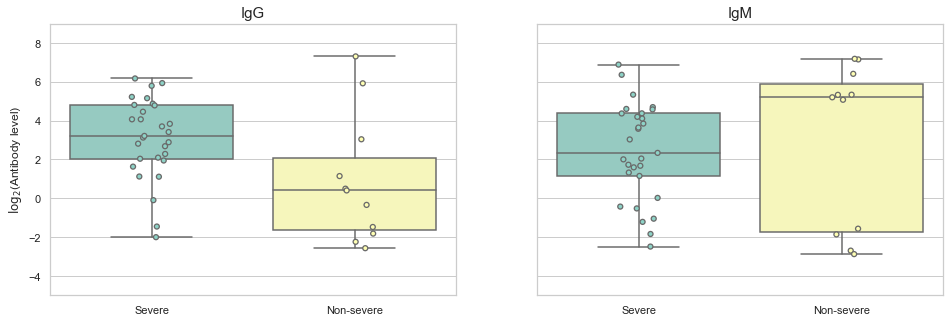

In [120]:
histo_sev(IgG_group_A,IgM_group_A, 'A')

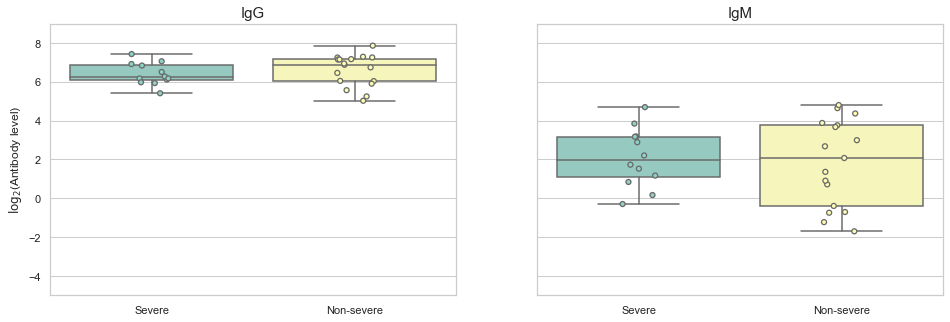

In [121]:
histo_sev(IgG_group_B,IgM_group_B, 'B')

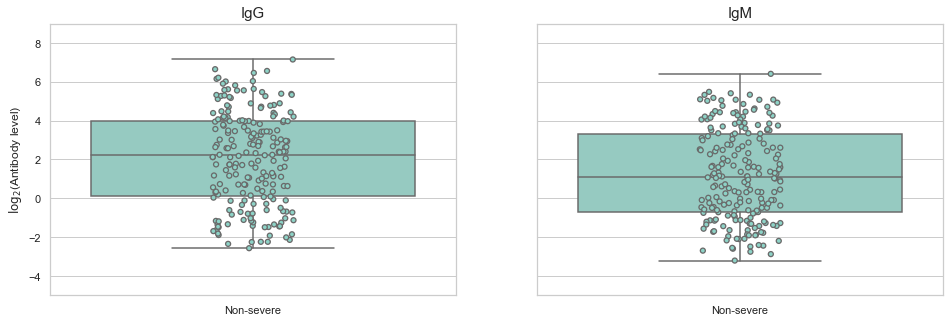

In [122]:
histo_sev(IgG_group_C, IgM_group_C,'C')

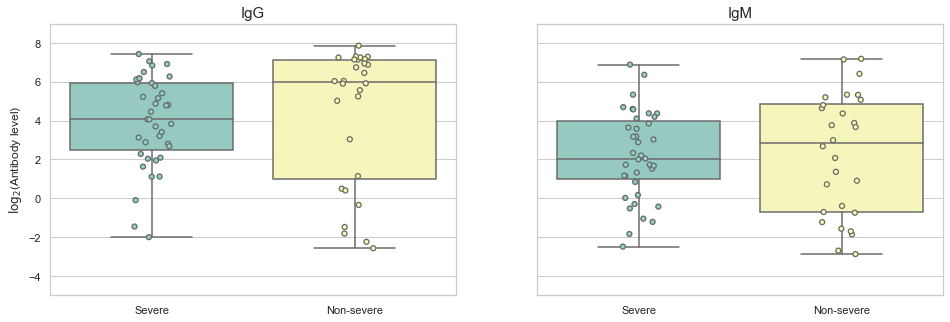

In [124]:
fig, ax = plt.subplots(1,2, figsize=(16,5), sharey = True)  

sns.boxplot(x = 'Severity',
                             y = 'Antibody level',
                             order = ['Severe', 'Non-severe'],
                             data = IgG_group_AuB,
                             palette="Set3",
                             ax=ax[0],
                            fliersize=0
                            )

sns.stripplot(x = 'Severity',
                          y = 'Antibody level',
                          order = ['Severe', 'Non-severe'],
                          data = IgG_group_AuB,
                          palette="Set3",
                          ax=ax[0],
                          linewidth=1.3,
                          edgecolor='gray'
                          )

sns.boxplot(x = 'Severity',
                             y = 'Antibody level',
                             order = ['Severe', 'Non-severe'],
                             data = IgM_group_AuB,
                             palette="Set3",
                             ax=ax[1],
                            fliersize=0
                            )

sns.stripplot(x = 'Severity',
                          y = 'Antibody level',
                          order = ['Severe', 'Non-severe'],
                          data = IgM_group_AuB,
                          palette="Set3",
                          ax=ax[1],
                          linewidth=1.3,
                          edgecolor='gray'
                          )


ax[0].set(xlabel=None,ylim=(-5, 9))
ax[1].set(xlabel=None)
ax[0].set(ylabel='$\log_2$(Antibody level)')
ax[1].set(ylabel=None)
ax[0].set_title('IgG', fontsize=15)
ax[1].set_title('IgM', fontsize=15)
#fig.suptitle("Grupo A $\cup$ B", fontsize=20)
plt.savefig('sAuB.pdf')

## Check the first two weeks

In [125]:
IgG_group_A.head()

,Patient ID,Days,Antibody level,Severity,Week,Mark
19,2,11,3.697996,Severe,2nd week,A
30,3,19,6.169384,Severe,3rd week,A
34,5,14,4.455820,Severe,2nd week,A
3,12,16,3.124328,Severe,3rd week,A
9,15,17,2.090176,Severe,3rd week,A


In [128]:
first_weeks_IgG_A = pd.concat([IgG_group_A[IgG_group_A['Week'] =='1st week'], IgG_group_A[IgG_group_A['Week'] =='2nd week']])
first_weeks_IgG_B = pd.concat([IgG_group_B[IgG_group_B['Week'] =='1st week'], IgG_group_B[IgG_group_B['Week'] =='2nd week']])
first_weeks_IgG_C = pd.concat([IgG_group_C[IgG_group_C['Week'] =='1st week'], IgG_group_C[IgG_group_C['Week'] =='2nd week']])
first_weeks_IgG_AuB = pd.concat([IgG_group_AuB[IgG_group_AuB['Week'] =='1st week'], IgG_group_AuB[IgG_group_AuB['Week'] =='2nd week']])
first_weeks_IgG_AuBuC_general = pd.concat([IgG_group_AuBuC_general[IgG_group_AuBuC_general['Week'] =='1st week'], IgG_group_AuBuC_general[IgG_group_AuBuC_general['Week'] =='2nd week']])


first_weeks_IgM_A = pd.concat([IgM_group_A[IgM_group_A['Week'] =='1st week'], IgM_group_A[IgM_group_A['Week'] =='2nd week']])
first_weeks_IgM_B = pd.concat([IgM_group_B[IgM_group_B['Week'] =='1st week'], IgM_group_B[IgM_group_B['Week'] =='2nd week']])
first_weeks_IgM_C = pd.concat([IgM_group_C[IgM_group_C['Week'] =='1st week'], IgM_group_C[IgM_group_C['Week'] =='2nd week']])
first_weeks_IgM_AuB = pd.concat([IgM_group_AuB[IgM_group_AuB['Week'] =='1st week'], IgM_group_AuB[IgM_group_AuB['Week'] =='2nd week']])
first_weeks_IgM_AuBuC_general = pd.concat([IgM_group_AuBuC_general[IgM_group_AuBuC_general['Week'] =='1st week'], IgM_group_AuBuC_general[IgM_group_AuBuC_general['Week'] =='2nd week']])


In [129]:
len(first_weeks_IgG_A),len(first_weeks_IgG_B),len(first_weeks_IgG_C)

(25, 20, 150)

In [130]:
def histo_sev_first(dataG, dataM, x):
    if x != 'C':
        fig, ax = plt.subplots(1,2, figsize=(16,5), sharey = True)  

        sns.boxplot(x = 'Severity',
                             y = 'Antibody level',
                             order = ['Severe', 'Non-severe'],
                             data = dataG,
                             palette="Set3",
                             ax=ax[0],
                            fliersize=0
                            )

        sns.stripplot(x = 'Severity',
                          y = 'Antibody level',
                          order = ['Severe', 'Non-severe'],
                          data = dataG,
                          palette="Set3",
                          ax=ax[0],
                          linewidth=1.3,
                          edgecolor='gray'
                          )

        sns.boxplot(x = 'Severity',
                             y = 'Antibody level',
                             order = ['Severe', 'Non-severe'],
                             data = dataM,
                             palette="Set3",
                             ax=ax[1],
                            fliersize=0
                            )

        sns.stripplot(x = 'Severity',
                          y = 'Antibody level',
                          order = ['Severe', 'Non-severe'],
                          data = dataM,
                          palette="Set3",
                          ax=ax[1],
                          linewidth=1.3,
                          edgecolor='gray'
                          )


        ax[0].set(xlabel=None,ylim=(-5, 9))
        ax[1].set(xlabel=None)
        ax[0].set(ylabel='$\log_2$(Antibody level)')
        ax[1].set(ylabel=None)
        ax[0].set_title('IgG', fontsize=15)
        ax[1].set_title('IgM', fontsize=15)
        #fig.suptitle("Grupo {0}".format(x), fontsize=20)
        plt.savefig('ws{0}.pdf'.format(x))
    else:
        fig, ax = plt.subplots(1,2, figsize=(16,5), sharey = True)  

        sns.boxplot(x = 'Severity',
                             y = 'Antibody level',
                             #order = ['Severe', 'Non-severe'],
                             data = dataG,
                             palette="Set3",
                             ax=ax[0],
                             fliersize=0
                            )

        sns.stripplot(x = 'Severity',
                          y = 'Antibody level',
                          #order = ['Severe', 'Non-severe'],
                          data = dataG,
                          palette="Set3",
                          ax=ax[0],
                          linewidth=1.3,
                          edgecolor='gray'
                          )

        sns.boxplot(x = 'Severity',
                             y = 'Antibody level',
                             #order = ['Severe', 'Non-severe'],
                             data = dataM,
                             palette="Set3",
                             ax=ax[1],
                             fliersize=0
                            )

        sns.stripplot(x = 'Severity',
                          y = 'Antibody level',
                          #order = ['Severe', 'Non-severe'],
                          data = dataM,
                          palette="Set3",
                          ax=ax[1],
                          linewidth=1.3,
                          edgecolor='gray'
                          )


        ax[0].set(xlabel=None,ylim=(-5, 9))
        ax[1].set(xlabel=None)
        ax[0].set(ylabel='$\log_2$(Antibody level)')
        ax[1].set(ylabel=None)
        ax[0].set_title('IgG', fontsize=15)
        ax[1].set_title('IgM', fontsize=15)
        #fig.suptitle("Grupo {0}".format(x), fontsize=20)
        plt.savefig('ws{0}.pdf'.format(x))

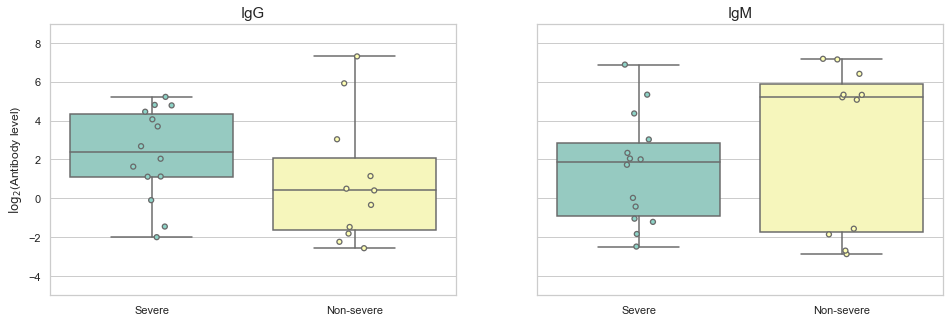

In [131]:
histo_sev_first(first_weeks_IgG_A, first_weeks_IgM_A, 'A')

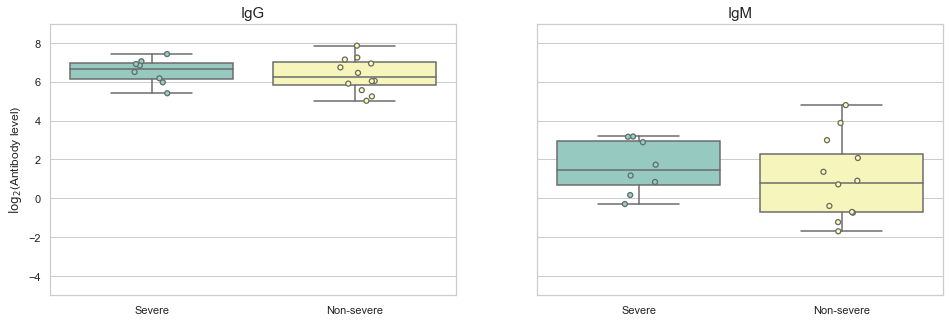

In [132]:
histo_sev_first(first_weeks_IgG_B, first_weeks_IgM_B, 'B')

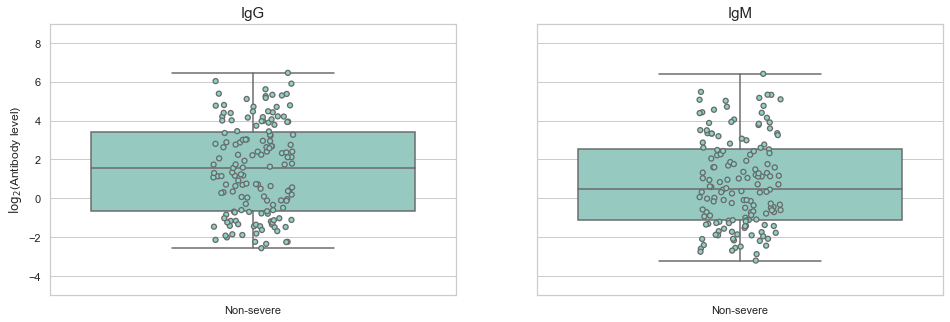

In [133]:
histo_sev_first(first_weeks_IgG_C, first_weeks_IgM_C, 'C')

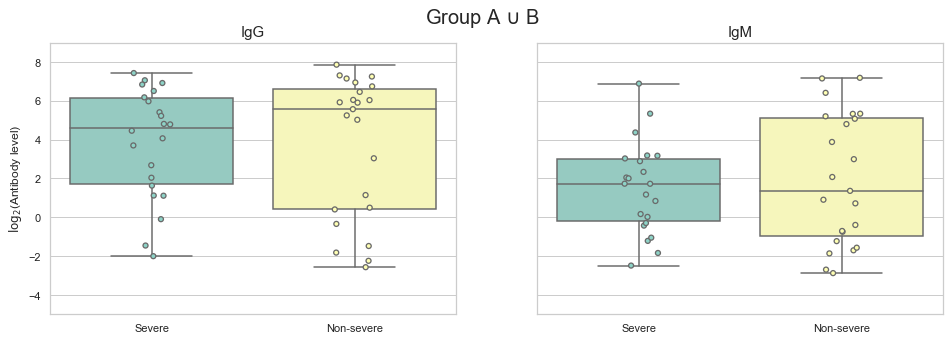

In [135]:
fig, ax = plt.subplots(1,2, figsize=(16,5), sharey = True)  

sns.boxplot(x = 'Severity',
                             y = 'Antibody level',
                             order = ['Severe', 'Non-severe'],
                             data = first_weeks_IgG_AuB,
                             palette="Set3",
                             ax=ax[0],
                            fliersize=0
                            )

sns.stripplot(x = 'Severity',
                          y = 'Antibody level',
                          order = ['Severe', 'Non-severe'],
                          data = first_weeks_IgG_AuB,
                          palette="Set3",
                          ax=ax[0],
                          linewidth=1.3,
                          edgecolor='gray'
                          )

sns.boxplot(x = 'Severity',
                             y = 'Antibody level',
                             order = ['Severe', 'Non-severe'],
                             data = first_weeks_IgM_AuB,
                             palette="Set3",
                             ax=ax[1],
                            fliersize=0
                            )

sns.stripplot(x = 'Severity',
                          y = 'Antibody level',
                          order = ['Severe', 'Non-severe'],
                          data = first_weeks_IgM_AuB,
                          palette="Set3",
                          ax=ax[1],
                          linewidth=1.3,
                          edgecolor='gray'
                          )


ax[0].set(xlabel=None,ylim=(-5, 9))
ax[1].set(xlabel=None)
ax[0].set(ylabel='$\log_2$(Antibody level)')
ax[1].set(ylabel=None)
ax[0].set_title('IgG', fontsize=15)
ax[1].set_title('IgM', fontsize=15)
fig.suptitle("Group A $\cup$ B", fontsize=20)
plt.savefig('wsAuB.pdf')

In [136]:
df1_export = pd.DataFrame.copy(df1)

In [137]:
df1_export = df1_export.astype({"Patient ID": str, "Days after symptoms onset": str, "IgG (S/CO)": float, "IgM (S/CO)": float, "Severity": str})

In [138]:
df1_export

,Patient ID,Days after symptoms onset,IgG (S/CO),IgM (S/CO),Severity
0,1,12,65.484,1.641,0
1,2,11,12.978,8.157,1
2,3,19,71.973,25.865,1
3,4,10,4.151,10.182,0
4,5,14,21.945,118.031,1
...,...,...,...,...,...
257,258,11,3.331,4.997,0
258,259,8,2.463,0.266,0
259,260,15,4.540,0.711,0
260,261,10,0.490,0.669,0


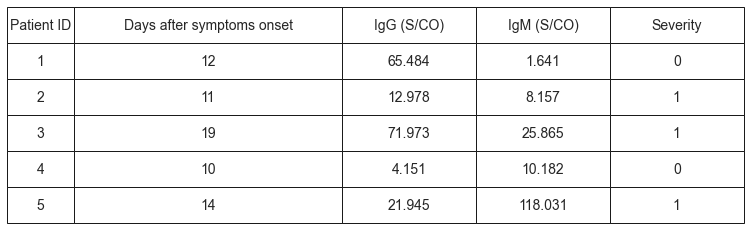

In [139]:
table = plt.table(cellText=df1_export.head().values, colLabels=df1_export.head().columns,
         cellLoc = 'center',
         loc = 'center',
         colLoc = 'center',
         rowLoc = 'center',
         #colColours = ['#CBF2B8']*5,
         edges = 'closed',
         colWidths = [0.05,0.20,0.10,0.10,0.10]
         )
plt.axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(4,3)
fig = table.figure

pp = PdfPages("table1.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

# Results of Mapper without severity information

In [140]:
df1.drop(['Patient ID', 'Severity'], axis=1)

,Days after symptoms onset,IgG (S/CO),IgM (S/CO)
0,12,65.484,1.641
1,11,12.978,8.157
2,19,71.973,25.865
3,10,4.151,10.182
4,14,21.945,118.031
...,...,...,...
257,11,3.331,4.997
258,8,2.463,0.266
259,15,4.540,0.711
260,10,0.490,0.669


In [141]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')
cover = OneDimensionalCover(n_intervals=100, overlap_frac=0.95, kind = 'balanced')

clusterer = DBSCAN(eps = 0.01,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    contract_nodes=True,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

In [142]:
node_scale = 20
fig = plot_interactive_mapper_graph(pipe, 
                                    df1.drop(['Severity'], axis=1), 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data = df1),
fig[0]

In [143]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')
cover = OneDimensionalCover(n_intervals=100, overlap_frac=0.9, kind = 'balanced')

clusterer = DBSCAN(eps = 0.01,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    contract_nodes=True,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)


node_scale = 20
fig2 = plot_static_mapper_graph(pipe, 
                                    df1.drop(['Patient ID', 'Severity'], axis=1), 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data= df1[['IgG (S/CO)'
                                                     
                                                    ]],
                                    plotly_params = {"layout" : {"font_size":14}}
                                   ),
fig2[0].write_image("images/sim_gen_IgG2.pdf")

In [144]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')
cover = OneDimensionalCover(n_intervals=100, overlap_frac=0.9, kind = 'balanced')

clusterer = DBSCAN(eps = 0.01,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    contract_nodes=True,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)


node_scale = 20
fig2 = plot_static_mapper_graph(pipe, 
                                    df1.drop(['Patient ID', 'Severity'], axis=1), 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data= df1[['IgM (S/CO)'
                                                    ]],
                                    plotly_params = {"layout" : {"font_size":14}}
                                   ),
fig2[0].write_image("images/sim_gen_IgM2.pdf")

In [145]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')
cover = OneDimensionalCover(n_intervals=100, overlap_frac=0.9, kind = 'balanced')

clusterer = DBSCAN(eps = 0.01,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    contract_nodes=True,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)


node_scale = 20
fig2 = plot_static_mapper_graph(pipe, 
                                    df1.drop(['Patient ID', 'Severity'], axis=1), 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data= df1[['Days after symptoms onset'
                                                    ]],
                                    plotly_params = {"layout" : {"font_size":14}}
                                   ),
fig2[0].write_image("images/sim_gen_Days2.pdf")

In [146]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')
cover = OneDimensionalCover(n_intervals=100, overlap_frac=0.9, kind = 'balanced')

clusterer = DBSCAN(eps = 0.01,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    contract_nodes=True,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)


node_scale = 20
fig2 = plot_static_mapper_graph(pipe, 
                                    df1.drop(['Patient ID', 'Severity'], axis=1), 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data= df1[['Severity'
                                                    ]],
                                    plotly_params = {"layout" : {"font_size":14}}
                                   ),
fig2[0].write_image("images/sim_gen_Severity2.pdf")